# Imports

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import dot
from numpy.linalg import norm
from scipy import spatial

# Constants

In [2]:
train_test_ratio = 0.80

In [3]:
os.getcwd()

'D:\\My_Files\\Rutgers\\Courses\\550 - Massive Data Mining\\Project\\Movie-Recommendation-System'

# Train-test split

In [4]:
data = pd.read_csv(os.path.join(os.getcwd(), 'data', 'ml-latest-small', 'ratings.csv'))
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
train_list = list()
test_list = list()

In [6]:
def apply_function(df: pd.DataFrame):
    global train_test_ratio, train_list, test_list
    df = df.sample(frac=1, random_state=124)
    train_size = math.ceil(len(df) * train_test_ratio)
    train_list.append(df.head(train_size))
    test_list.append(df.tail(len(df) - train_size))
    
data.groupby(by=['userId']).apply(apply_function)

""


In [7]:
train_df = pd.concat(train_list)
train_df

,userId,movieId,rating,timestamp
120,1,2018,5.0,964980523
163,1,2528,3.0,964982328
56,1,1032,5.0,964982791
74,1,1213,5.0,964982951
224,1,3703,5.0,964981909
...,...,...,...,...
99992,610,6873,3.0,1479544373
100287,610,55995,3.0,1493846528
100728,610,117867,4.0,1493849881
100662,610,107348,3.5,1479544713


In [8]:
test_df = pd.concat(test_list)
test_df

,userId,movieId,rating,timestamp
67,1,1136,5.0,964981327
226,1,3740,4.0,964982417
180,1,2716,5.0,964983414
168,1,2596,5.0,964981144
112,1,1805,4.0,964983056
...,...,...,...,...
100496,610,85510,3.0,1493847872
99669,610,2028,5.0,1479545856
99551,610,293,5.0,1479542783
100202,610,46578,5.0,1479542918


In [9]:
train_df.userId.unique().size

610

In [10]:
train_df.movieId.unique().size

9024

In [11]:
set(train_df.movieId.unique()) >= set(test_df.movieId.unique())

False

In [12]:
len(set(test_df.movieId.unique()).difference(set(train_df.movieId.unique())))

700

In [13]:
movies_df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'ml-latest-small', 'movies.csv'))
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [14]:
unique_genres = set()
for genres in movies_df.genres:
    for genre in genres.split("|"):
        unique_genres.add(genre)

In [15]:
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

<AxesSubplot:>

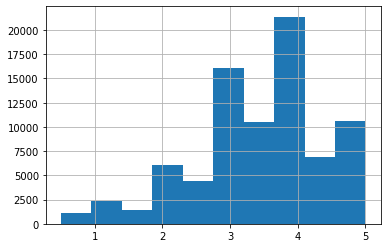

In [16]:
train_df.rating.hist(bins=10)

In [17]:
movies_df['genres'].str.get_dummies(sep='|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
movies_df = pd.concat([movies_df, movies_df['genres'].str.get_dummies(sep='|')], axis=1).drop(['title', 'genres'], axis=1)
movies_df

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
tmp_list = list()
user_avg_rating_dict = dict()

def apply_function(df: pd.DataFrame):
    df = df.drop(['timestamp'], axis=1)
    user_avg_rating_dict[df.iloc[0, 0]] = df.rating.mean()
    df.rating = df.rating - df.rating.mean()
    tmp_list.append(df)
    
train_df.groupby(by=['userId']).apply(apply_function)

""


In [19]:
duplicate_train_df = pd.concat(tmp_list)
duplicate_train_df

,userId,movieId,rating
120,1,2018,0.655914
163,1,2528,-1.344086
56,1,1032,0.655914
74,1,1213,0.655914
224,1,3703,0.655914
...,...,...,...
99992,610,6873,-0.686180
100287,610,55995,-0.686180
100728,610,117867,0.313820
100662,610,107348,-0.186180


In [21]:
user_train_df = pd.merge(duplicate_train_df, movies_df, how='left', left_on=['movieId'], right_on = ['movieId'])
user_train_df

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2018,0.655914,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2528,-1.344086,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1032,0.655914,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1213,0.655914,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,3703,0.655914,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80891,610,6873,-0.686180,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
80892,610,55995,-0.686180,0,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
80893,610,117867,0.313820,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
80894,610,107348,-0.186180,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for column in movies_df.columns:
    if column == 'movieId':
        continue
    user_train_df.loc[:, column] *= user_train_df.loc[:, 'rating']

In [25]:
user_train_df = user_train_df.groupby(by=['userId']).mean()
user_train_df

,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,,
1,1828.016129,3.056098e-16,0.0,-0.014915,0.008787,0.048850,0.033877,-0.043473,-0.005781,0.000000,...,0.003526,-0.079836,0.000000,0.047347,-0.004394,-0.002891,-0.019713,-0.042086,0.009886,0.001503
2,73487.708333,0.000000e+00,0.0,0.031250,0.036458,0.000000,0.000000,-0.015625,-0.041667,0.057292,...,0.000000,-0.036458,-0.026042,0.000000,0.005208,0.000000,-0.005208,-0.083333,0.026042,-0.015625
3,8194.500000,0.000000e+00,0.0,0.358398,0.051758,-0.196289,-0.261719,-0.382812,0.000000,0.000000,...,0.000000,0.523438,0.000000,-0.065430,0.075195,-0.261719,0.677734,0.263672,-0.261719,0.000000
4,1953.537572,2.130601e-16,0.0,-0.021685,0.032577,0.019145,0.015604,-0.017374,0.071235,0.005346,...,-0.000434,0.013799,-0.003107,0.057870,-0.023923,-0.053994,-0.045307,-0.020315,-0.009756,0.012931
5,362.527778,-4.934325e-17,0.0,-0.135802,-0.091049,0.109568,0.103395,-0.092593,0.052469,0.000000,...,0.000000,-0.016975,0.004630,0.109568,0.010802,-0.125000,-0.061728,-0.063272,-0.033951,-0.033951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,9541.948430,-8.762298e-17,0.0,-0.075894,-0.020003,0.003740,-0.007890,-0.032335,-0.003072,0.000865,...,0.000701,-0.016391,-0.008127,0.002597,0.006664,0.033569,-0.009336,-0.029389,0.003999,-0.004366
607,1889.026667,-1.125026e-16,0.0,-0.029289,-0.091778,-0.006444,-0.035200,-0.129956,-0.000489,0.000000,...,0.000000,0.046622,0.008044,0.005511,0.079289,-0.028311,-0.112000,0.114178,0.026889,0.002756
608,4536.996992,8.414322e-17,0.0,0.061694,0.010732,-0.004883,-0.073494,-0.159169,0.078702,-0.002374,...,0.003989,0.016090,0.011215,-0.011468,0.043633,-0.037475,0.038322,0.129197,0.009418,-0.007756


In [34]:
user_to_feature_dict = dict()
movie_to_feature_dict = dict()

In [35]:
for index, row in user_train_df.iterrows():
    user_to_feature_dict[index] = row.iloc[2:].tolist()

In [36]:
len(user_to_feature_dict)

610

In [38]:
for index, row in movies_df.iterrows():
    movie_to_feature_dict[row['movieId']] = row.iloc[1:].tolist()

In [39]:
len(movie_to_feature_dict)

9742

In [40]:
movie_to_feature_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 57, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 128, 129, 132, 135, 137, 140, 141, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 246, 247, 248, 249, 250, 251, 252, 2

In [43]:
test_df

,userId,movieId,rating,timestamp
67,1,1136,5.0,964981327
226,1,3740,4.0,964982417
180,1,2716,5.0,964983414
168,1,2596,5.0,964981144
112,1,1805,4.0,964983056
...,...,...,...,...
100496,610,85510,3.0,1493847872
99669,610,2028,5.0,1479545856
99551,610,293,5.0,1479542783
100202,610,46578,5.0,1479542918


In [44]:
user_similarity_on_test_dict = dict()

for index, row in test_df.iterrows():
    similarity = 1 - spatial.distance.cosine(user_to_feature_dict[row['userId']], movie_to_feature_dict[row['movieId']])
    if row['userId'] in user_similarity_on_test_dict:
        user_similarity_on_test_dict[row['userId']].append((similarity, row['movieId']))
    else:
        tmp_lst = list()
        tmp_lst.append((similarity, row['movieId']))
        user_similarity_on_test_dict[row['userId']] = tmp_lst

C:\Users\Dell\anaconda3\envs\mdm-assignments\lib\site-packages\scipy\spatial\distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [45]:
user_similarity_on_test_dict

{1.0: [(-0.25199041825814783, 1136.0),
  (-0.2722122386788979, 3740.0),
  (-0.32640369613303766, 2716.0),
  (-0.007989307051619488, 2596.0),
  (-0.03745272153998602, 1805.0),
  (0.6224684166562078, 1029.0),
  (-0.2521070225178028, 2580.0),
  (-0.23731200945924624, 804.0),
  (0.11910956491013269, 553.0),
  (-0.17754015670267753, 2470.0),
  (0.502577861112004, 1030.0),
  (-0.22734706000087934, 1270.0),
  (0.3033879677820175, 1954.0),
  (0.23435350499559493, 1097.0),
  (-0.031365427684138636, 1049.0),
  (0.502577861112004, 2099.0),
  (-0.2458488704440469, 780.0),
  (-0.0861069760007982, 2872.0),
  (-0.1313749174897385, 2985.0),
  (-0.10799589353920558, 2628.0),
  (-0.01908652257180532, 3176.0),
  (-0.23731200945924624, 2492.0),
  (0.05605155995770983, 2291.0),
  (-0.2458488704440469, 1127.0),
  (-0.0755331423236596, 2959.0),
  (-0.2014956939859014, 2949.0),
  (0.2651266340093339, 3053.0),
  (0.4829099514764803, 2139.0),
  (0.3033879677820175, 954.0),
  (-0.03768984204052739, 940.0),
  (-0

In [46]:
actual_rating_on_test_dict = dict()
for index, row in test_df.iterrows():
    if row['userId'] in actual_rating_on_test_dict:
        actual_rating_on_test_dict[row['userId']].append((row['rating'], row['movieId']))
    else:
        tmp_lst = list()
        tmp_lst.append((row['rating'], row['movieId']))
        actual_rating_on_test_dict[row['userId']] = tmp_lst

In [47]:
actual_rating_on_test_dict

{1.0: [(5.0, 1136.0),
  (4.0, 3740.0),
  (5.0, 2716.0),
  (5.0, 2596.0),
  (4.0, 1805.0),
  (5.0, 1029.0),
  (5.0, 2580.0),
  (4.0, 804.0),
  (5.0, 553.0),
  (5.0, 2470.0),
  (3.0, 1030.0),
  (5.0, 1270.0),
  (5.0, 1954.0),
  (5.0, 1097.0),
  (5.0, 1049.0),
  (4.0, 2099.0),
  (3.0, 780.0),
  (5.0, 2872.0),
  (4.0, 2985.0),
  (4.0, 2628.0),
  (1.0, 3176.0),
  (4.0, 2492.0),
  (5.0, 2291.0),
  (4.0, 1127.0),
  (5.0, 2959.0),
  (5.0, 2949.0),
  (5.0, 3053.0),
  (5.0, 2139.0),
  (5.0, 954.0),
  (5.0, 940.0),
  (3.0, 1408.0),
  (5.0, 1210.0),
  (5.0, 2944.0),
  (5.0, 2353.0),
  (5.0, 362.0),
  (5.0, 5060.0),
  (5.0, 527.0),
  (4.0, 356.0),
  (4.0, 1967.0),
  (5.0, 1092.0),
  (4.0, 2616.0),
  (5.0, 2987.0),
  (5.0, 2116.0),
  (3.0, 316.0),
  (5.0, 2427.0),
  (3.0, 3243.0)],
 2.0: [(5.0, 60756.0),
  (4.5, 1704.0),
  (4.0, 48516.0),
  (4.0, 86345.0),
  (4.0, 79132.0)],
 3.0: [(0.5, 2424.0),
  (0.5, 31.0),
  (0.5, 647.0),
  (0.5, 1093.0),
  (0.5, 2090.0),
  (5.0, 5181.0),
  (4.5, 1587.0)],
 4.0

In [51]:
for key in user_similarity_on_test_dict.keys():
    user_similarity_on_test_dict[key].sort(reverse=True)

for key in actual_rating_on_test_dict.keys():
    actual_rating_on_test_dict[key].sort(reverse=True)

In [52]:
k=10

In [53]:
user_top_k_recommendation = dict()
actual_top_k_rating = dict()

In [54]:
for key in user_similarity_on_test_dict.keys():
    for idx in range(min(k, len(user_similarity_on_test_dict[key]))):
        if key in user_top_k_recommendation:
            user_top_k_recommendation[key].append(user_similarity_on_test_dict[key][idx][1])
        else:
            tmp_lst = list()
            tmp_lst.append(user_similarity_on_test_dict[key][idx][1])
            user_top_k_recommendation[key] = tmp_lst

In [55]:
for key in actual_rating_on_test_dict.keys():
    for idx in range(min(k, len(actual_rating_on_test_dict[key]))):
        if key in actual_top_k_rating:
            actual_top_k_rating[key].append(actual_rating_on_test_dict[key][idx][1])
        else:
            tmp_lst = list()
            tmp_lst.append(actual_rating_on_test_dict[key][idx][1])
            actual_top_k_rating[key] = tmp_lst

In [95]:
TP = dict()
FP = dict()
FN = dict()

is_first = True

for key in user_top_k_recommendation.keys():
    
    if len(actual_rating_on_test_dict[key]) <= 10:
        continue
    
    tp = 0
    fp = 0
    fn = 0
    
    for val in user_top_k_recommendation[key]:
        if val in set(actual_top_k_rating[key]):
            tp += 1
        else:
            fp += 1
    
    for val in actual_top_k_rating[key]:
        if val not in set(user_top_k_recommendation[key]):
            fn += 1
    
    TP[key] = tp
    FP[key] = fp
    FN[key] = fn
    

In [96]:
precision = 0
recall = 0
cnt = 0

for key in TP.keys():
    precision += TP[key] / (TP[key] + FP[key])
    recall += TP[key] / (TP[key] + FN[key])
    cnt += 1

In [97]:
precision/cnt, recall/cnt

(0.47609890109890146, 0.47609890109890146)

In [ ]:
# Redundant work down here.

In [104]:
cnt = 0
for row_index, row in user_movie_df.iterrows():
    for col_index in list(row.index):
        user_movie_df.loc[row_index, col_index] = 1 - spatial.distance.cosine(user_to_feature_dict[row_index],
                                                                              movie_to_feature_dict[col_index])
    print('Completed', cnt)
    cnt += 1

Completed 0
Completed 1
Completed 2
Completed 3
Completed 4
Completed 5
Completed 6
Completed 7
Completed 8
Completed 9
Completed 10
Completed 11
Completed 12
Completed 13
Completed 14
Completed 15
Completed 16
Completed 17
Completed 18
Completed 19
Completed 20
Completed 21
Completed 22
Completed 23
Completed 24
Completed 25
Completed 26
Completed 27
Completed 28
Completed 29
Completed 30
Completed 31
Completed 32
Completed 33
Completed 34
Completed 35
Completed 36
Completed 37
Completed 38
Completed 39
Completed 40
Completed 41
Completed 42
Completed 43
Completed 44
Completed 45
Completed 46
Completed 47
Completed 48
Completed 49
Completed 50
Completed 51
Completed 52
Completed 53
Completed 54
Completed 55
Completed 56
Completed 57
Completed 58
Completed 59
Completed 60
Completed 61
Completed 62
Completed 63
Completed 64
Completed 65
Completed 66
Completed 67
Completed 68
Completed 69
Completed 70
Completed 71
Completed 72
Completed 73
Completed 74
Completed 75
Completed 76
Completed

Completed 593
Completed 594
Completed 595
Completed 596
Completed 597
Completed 598
Completed 599
Completed 600
Completed 601
Completed 602
Completed 603
Completed 604
Completed 605
Completed 606
Completed 607
Completed 608
Completed 609


In [102]:
1 - spatial.distance.cosine(user_to_feature_dict[1], movie_to_feature_dict[1])

0.07261177775786298

In [103]:
dot(user_to_feature_dict[1], movie_to_feature_dict[1])/(norm(user_to_feature_dict[1])*norm(movie_to_feature_dict[1]))

0.07261177775786305

In [105]:
user_movie_df.iloc[0, :].tolist()

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.072612,0.071272,-0.237312,-0.018603,-0.314687,-0.262379,-0.237312,0.218374,-0.107964,-0.201496,...,-0.105872,0.464563,-0.007989,0.353604,0.0,-0.127214,-0.084561,0.303388,0.173693,-0.314687
2,0.068549,0.154869,-0.081289,-0.199117,-0.11496,-0.398234,-0.081289,0.189675,0.22992,-0.066372,...,0.03832,-0.162578,-0.243868,0.0,0.421521,0.05748,-0.066372,-0.22992,0.162578,-0.11496
3,-0.252316,-0.074551,-0.342398,-0.565911,-0.2876,0.269825,-0.342398,-0.111539,0.269258,0.292275,...,0.17168,-0.454975,-0.554063,-0.147468,0.0,-0.068598,-0.234667,-0.495963,0.086118,-0.2876
4,0.208008,0.261034,-0.370326,-0.441522,-0.127497,0.123864,-0.370326,0.250004,-0.159126,-0.03992,...,-0.239303,-0.071083,-0.26058,0.140492,0.03923,-0.023783,0.064409,-0.241019,-0.013176,-0.127497
5,0.177868,0.201561,-0.440599,-0.186252,-0.26515,-0.242383,-0.440599,0.024999,-0.388886,-0.479664,...,-0.258521,0.43435,0.024999,0.31376,0.0,-0.013257,0.209215,0.300503,-0.053122,-0.26515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-0.205004,-0.142489,0.006458,0.397783,-0.239283,-0.462938,0.006458,-0.145958,-0.56162,-0.535278,...,-0.421154,0.500296,0.311526,0.027678,0.006399,-0.406804,-0.145485,0.679847,-0.377554,-0.239283
607,-0.457835,-0.29754,-0.417122,-0.139445,-0.484377,0.181623,-0.417122,-0.334658,-0.109167,-0.014824,...,-0.517508,0.229353,-0.096169,-0.02402,0.0,-0.32982,-0.317816,0.348374,-0.094177,-0.484377
608,-0.420479,-0.192299,-0.514611,-0.214824,-0.589076,0.57605,-0.514611,-0.164246,0.228325,0.430816,...,-0.118498,0.238727,-0.165034,-0.018073,-0.008787,-0.239807,-0.408729,0.355684,0.148671,-0.589076
609,-0.070892,-0.078446,-0.272218,-0.078446,-0.022646,0.065372,-0.272218,-0.096077,-0.475556,-0.143818,...,-0.475556,0.176141,0.160128,0.0,-0.181164,-0.249101,-0.013074,0.249101,-0.336269,-0.022646


In [111]:
tmp_lst = np.array(user_movie_df.iloc[0, :].tolist())
np.argsort(tmp_lst)

array([5978, 4724, 2862, ...,   44, 1273,  786], dtype=int64)

In [134]:
user_train_movies_dict = dict()
user_test_movies_dict = dict()

In [135]:
for index, row in train_df.iterrows():
    if row['userId'] in user_train_movies_dict:
        user_train_movies_dict[row['userId']].append(row['movieId'])
    else:
        tmp_lst = list()
        tmp_lst.append(row['movieId'])
        user_train_movies_dict[row['userId']] = tmp_lst

for index, row in test_df.iterrows():
    if row['userId'] in user_test_movies_dict:
        user_test_movies_dict[row['userId']].append(row['movieId'])
    else:
        tmp_lst = list()
        tmp_lst.append(row['movieId'])
        user_test_movies_dict[row['userId']] = tmp_lst

In [136]:
user_recommended_movies = dict()
for index, user in user_movie_df.iterrows():
    no_recommendation = 10
    tmp_lst = list()
    for idx in np.argsort(np.array(user_movie_df.loc[index, :].tolist()))[::-1]:
        if user_movie_df.columns[idx] in user_train_movies_dict[index]:
            continue
        no_recommendation -= 1
        tmp_lst.append(user_movie_df.columns[idx])
        if no_recommendation == 0:
            break
    user_recommended_movies[index] = tmp_lst

In [137]:
user_recommended_movies[1]

[1029, 1688, 48, 783, 5629, 91488, 1489, 31193, 60803, 364]

In [138]:
test_df

,userId,movieId,rating,timestamp
67,1,1136,5.0,964981327
226,1,3740,4.0,964982417
180,1,2716,5.0,964983414
168,1,2596,5.0,964981144
112,1,1805,4.0,964983056
...,...,...,...,...
100496,610,85510,3.0,1493847872
99669,610,2028,5.0,1479545856
99551,610,293,5.0,1479542783
100202,610,46578,5.0,1479542918


In [140]:
# Precision
user_relevant_items = dict()

for index, row in test_df.iterrows():
    if row['rating'] >= user_avg_rating_dict[row['userId']]:
        if row['userId'] in user_relevant_items:
            user_relevant_items[row['userId']].append(row['movieId'])
        else:
            tmp_lst = list()
            tmp_lst.append(row['movieId'])
            user_relevant_items[row['userId']] = tmp_lst

{1.0: [1136.0,
  2716.0,
  2596.0,
  1029.0,
  2580.0,
  553.0,
  2470.0,
  1270.0,
  1954.0,
  1097.0,
  1049.0,
  2872.0,
  2291.0,
  2959.0,
  2949.0,
  3053.0,
  2139.0,
  954.0,
  940.0,
  1210.0,
  2944.0,
  2353.0,
  362.0,
  5060.0,
  527.0,
  1092.0,
  2987.0,
  2116.0,
  2427.0],
 2.0: [60756.0, 1704.0, 48516.0, 86345.0, 79132.0],
 3.0: [5181.0, 1587.0],
 4.0: [2843.0,
  1080.0,
  3176.0,
  910.0,
  457.0,
  912.0,
  1250.0,
  1077.0,
  930.0,
  2204.0,
  608.0,
  3317.0,
  3033.0,
  2683.0,
  4021.0,
  2359.0,
  898.0,
  800.0,
  1179.0,
  2762.0,
  319.0,
  1914.0,
  1073.0,
  3204.0,
  4033.0,
  2921.0],
 5.0: [1.0, 34.0, 110.0, 296.0, 457.0],
 6.0: [6.0,
  337.0,
  158.0,
  281.0,
  22.0,
  160.0,
  216.0,
  457.0,
  292.0,
  76.0,
  1004.0,
  207.0,
  848.0,
  230.0,
  356.0,
  195.0,
  349.0,
  168.0,
  542.0,
  1064.0,
  93.0,
  60.0,
  350.0,
  468.0,
  991.0,
  500.0,
  802.0,
  304.0],
 7.0: [1210.0,
  2858.0,
  2019.0,
  8870.0,
  3114.0,
  2529.0,
  1517.0,
  5618